In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
data = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [4]:
data = np.sort(data)
data

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [5]:
min = data.min()
max = data.max()
min, max

(np.int64(150), np.int64(173))

In [6]:
np.unique(data, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

<BarContainer object of 40 artists>

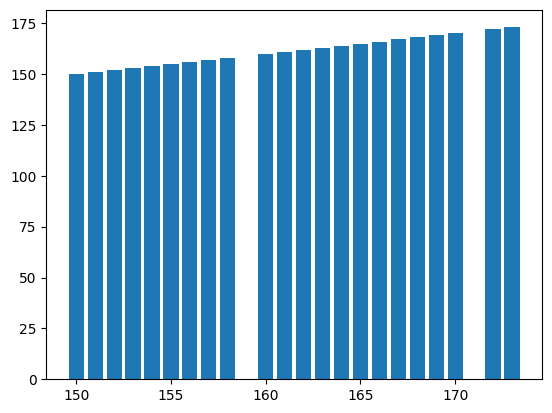

In [7]:
plt.bar(data, data)

In [8]:
n = len(data)
i = 1 + 3.3 * np.log10(n)
i = round(i)
i, n

(6, 40)

In [9]:
AA = max - min
h = AA / i
h = math.ceil(h)

In [10]:
interval = np.arange(min, max+2, step=h)
interval

array([150, 154, 158, 162, 166, 170, 174])

In [11]:
counts, edges = np.histogram(data, bins=interval)
counts, edges

(array([ 5,  9, 11,  7,  5,  3]), array([150, 154, 158, 162, 166, 170, 174]))

In [12]:
bin_labels = []
for i in range(len(edges) - 1):
    # f-string to format the label: "start-end"
    label = f"{edges[i]}-{edges[i+1]}"
    bin_labels.append(label)
bin_labels

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

<BarContainer object of 6 artists>

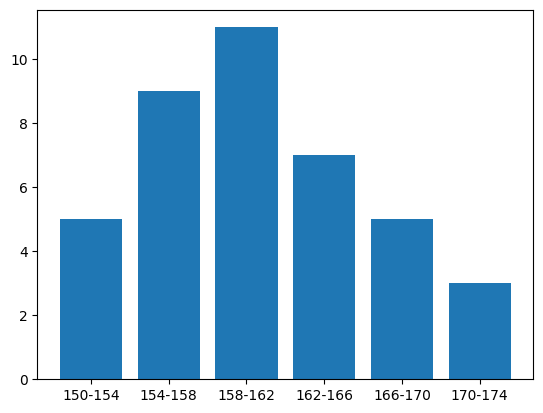

In [13]:
plt.bar(bin_labels, counts)

In [23]:
dataset = pd.read_csv("census.csv")
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


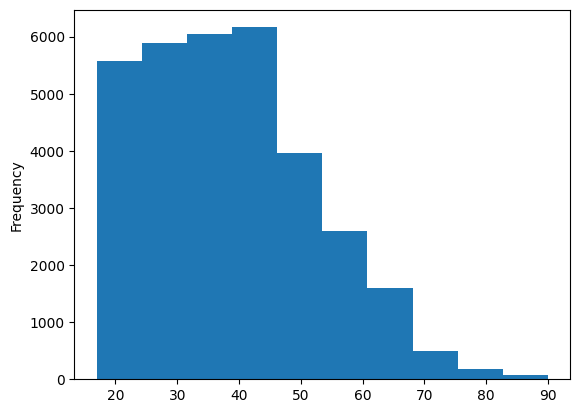

In [24]:
dataset['age'].plot.hist();

In [25]:
dataset['age'] = pd.cut(dataset['age'], bins=[0, 17, 25, 40, 60, 90],
                        labels=['Faixa1', "Faixa2", "Faixa3", "Faixa4", "Faixa5"])

In [26]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
dataset_apriori = dataset[
    ["age", "workclass", "education", "marital-status", "relationship",
     "occupation", "sex", "native-country", "income"]
  ]

In [30]:
dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [31]:
dataset_apriori = dataset_apriori.sample(n=1000)
dataset_apriori.shape

(1000, 9)

In [35]:
transactions = dataset_apriori.astype(str).values.tolist()

transactions[:5]

[['Faixa4',
  ' Self-emp-not-inc',
  ' Some-college',
  ' Separated',
  ' Unmarried',
  ' Other-service',
  ' Female',
  ' United-States',
  ' <=50K'],
 ['Faixa3',
  ' Private',
  ' Some-college',
  ' Married-civ-spouse',
  ' Husband',
  ' Transport-moving',
  ' Male',
  ' United-States',
  ' >50K'],
 ['Faixa2',
  ' Private',
  ' Bachelors',
  ' Never-married',
  ' Not-in-family',
  ' Tech-support',
  ' Male',
  ' ?',
  ' <=50K'],
 ['Faixa3',
  ' Private',
  ' HS-grad',
  ' Divorced',
  ' Unmarried',
  ' Craft-repair',
  ' Male',
  ' United-States',
  ' <=50K'],
 ['Faixa3',
  ' Private',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Wife',
  ' Adm-clerical',
  ' Female',
  ' United-States',
  ' >50K']]

In [36]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=3efd8129dd637a5d7dbe9aa1275c54f12d89d7cda42d34391353550545dee963
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [37]:
from apyori import apriori

In [38]:
rules = apriori(transactions, min_support=0.3, min_confidance=0.2)
results = list(rules)

In [40]:
results

[RelationRecord(items=frozenset({' <=50K'}), support=0.769, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.769, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.351, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.351, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.317, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.317, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.408, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.408, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.649, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.649, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0